# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
RUN_ID = '0036'
RUN_FOLDER = os.path.join("./run", RUN_ID)

BATCH_SIZE = 128
IMAGE_SIZE = 32

## data

In [3]:
label = 15
(x_train, y_train) = load_cifar(label,100)
# (x_train, y_train) = load_safari('elephant')


## architecture

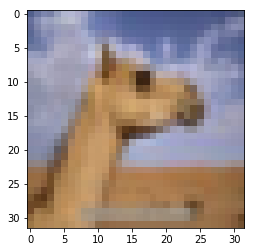

In [4]:
plt.imshow((x_train[2,:,:,:]+1)*0.5)

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
print(x_train.shape)

(600, 32, 32, 3)


In [7]:


# gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
#         , critic_conv_filters = [64,128,256,512]
#         , critic_conv_kernel_size = [5,5,5,5]
#         , critic_conv_strides = [2,2,2,2]
#         , critic_conv_padding = 'same'
#         , critic_batch_norm_momentum = None #0.9
#         , critic_activation = 'leaky_relu'
#         , critic_dropout_rate = None
#         , critic_learning_rate = 0.00005
#         , generator_initial_dense_layer_size = (4, 4, 512)
#         , generator_upsample =[1,1,1,1]
#         , generator_conv_filters = [256,128, 64,3]
#         , generator_conv_kernel_size = [3,3,3,3]
#         , generator_conv_strides = [2,2,2,2]
#         , generator_conv_padding = 'same'
#         , generator_batch_norm_momentum = 0.9
#         , generator_activation = 'relu'
#         , generator_dropout_rate = None
#         , generator_learning_rate = 0.00005
#         , optimiser = 'rmsprop'
#         , z_dim = 100
#         )

gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,64,128,128]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 16, 16, 128)       204928    
__________

## training

In [ ]:
gan.train(     
    x_train
    , batch_size = 128
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , large_it_critic = 10
    , large_n_critic = 5
    , clip_threshold = 0.01
    , using_generator = False
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.001] 
1 (5, 1) [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
2 (5, 1) [D loss: (-0.001)(R -0.002, F 0.001)]  [G loss: -0.000] 
3 (5, 1) [D loss: (-0.000)(R -0.002, F 0.002)]  [G loss: -0.000] 
4 (5, 1) [D loss: (-0.003)(R -0.004, F 0.001)]  [G loss: -0.001] 
5 (5, 1) [D loss: (-0.001)(R -0.004, F 0.004)]  [G loss: -0.002] 
6 (5, 1) [D loss: (-0.001)(R -0.005, F 0.004)]  [G loss: -0.004] 
7 (5, 1) [D loss: (-0.000)(R -0.006, F 0.006)]  [G loss: -0.004] 
8 (5, 1) [D loss: (-0.001)(R -0.006, F 0.005)]  [G loss: -0.004] 
9 (5, 1) [D loss: (-0.002)(R -0.006, F 0.004)]  [G loss: -0.010] 
10 (5, 1) [D loss: (0.001)(R -0.005, F 0.006)]  [G loss: -0.004] 
11 (5, 1) [D loss: (-0.001)(R -0.004, F 0.003)]  [G loss: -0.002] 
12 (5, 1) [D loss: (-0.001)(R -0.003, F 0.002)]  [G loss: -0.003] 
13 (5, 1) [D loss: (-0.001)(R -0.002, F 0.001)]  [G loss: 0.000] 
14 (5, 1) [D loss: (-0.002)(R -0.001, F -0.000)]  [G loss: 0.003] 
15 (5, 

In [ ]:
check = True
while check :
    
    for _ in range(5):

        valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
        fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)

        idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
        true_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
        gen_imgs = gan.generator.predict(noise)

        d_loss_real =   gan.critic.train_on_batch(true_imgs, valid)
        d_loss_fake =   gan.critic.train_on_batch(gen_imgs, fake)
        d_loss = (d_loss_real + d_loss_fake)

    for l in gan.critic.layers:
        weights = l.get_weights()
        weights = [np.clip(w, -0.01, 0.01) for w in weights]
        l.set_weights(weights)

    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)]" % (d_loss, d_loss_real, d_loss_fake))
    
      
    

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.3f]" % (g_loss))
    
    g_loss = gan.model.test_on_batch(noise, valid)
    print ("[G loss: %.3f]" % (g_loss))
    print('-------')
    


In [ ]:
noise = np.random.normal(0, 1, (BATCH_SIZE,100))
img = gan.generator.predict(np.array([noise[0]]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

In [ ]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
img = x_train[idx]
print(gan.critic.predict(np.array([img]))[0])
plt.imshow((img + 1) * 0.5)

In [ ]:
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=1)



In [ ]:
print(gan.model.to_json(indent=4))

In [ ]:
[x[0] for x in gan.d_losses][:100]

In [ ]:
gan.g_losses[:100]

In [ ]:
gan.critic.get_weights()